In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funcs import sdeSimulation, blackScholes, blackScholesSDE

Text(0.5, 1.0, 'Ohrnstein-Uhlenbeck Process for $\\theta = 5.5$ and $\\sigma = 0$')

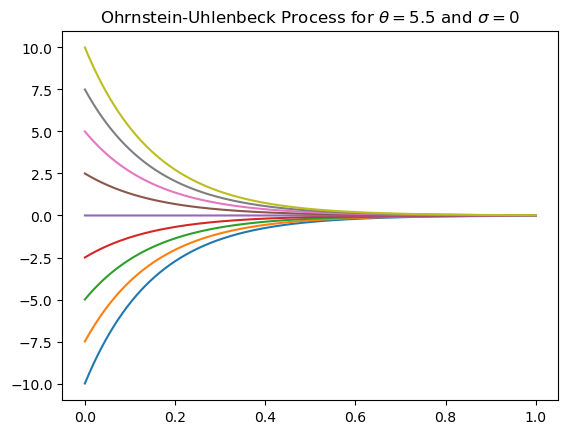

In [2]:
results = sdeSimulation(1e4, 1, 0, 3.5) # steps, x0, sigma, theta
initialConditions = np.arange(-10, 12.5, 2.5)
sigmaList = np.arange(-10, 12.5, 2.5)
plotList = []

for i in initialConditions:
    plotList.append(plt.plot(sdeSimulation(1e4, i, 0, 3.5)[1], sdeSimulation(1e4, i, 0, 6.5)[0]))

plt.title(r"Ohrnstein-Uhlenbeck Process for $\theta = 5.5$ and $\sigma = 0$")

Text(0.5, 1.0, 'Ohrnstein-Uhlenbeck Process for $\\theta = 6.5$ and $\\sigma = 0.5$')

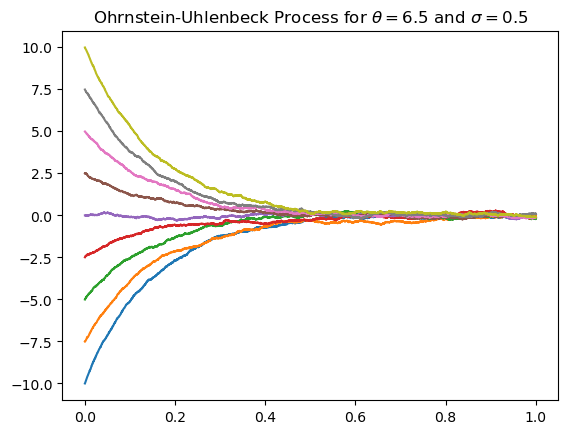

In [3]:
for i in initialConditions:
    plotList.append(plt.plot(sdeSimulation(1e4, i, 0.5, 3.5)[1], sdeSimulation(1e4, i, 0.5, 6.5)[0]))

plt.title(r"Ohrnstein-Uhlenbeck Process for $\theta = 6.5$ and $\sigma = 0.5$")

Text(0.5, 1.0, 'Ohrnstein-Uhlenbeck Process for $\\theta = 6.5$ $\\sigma = 5.5$')

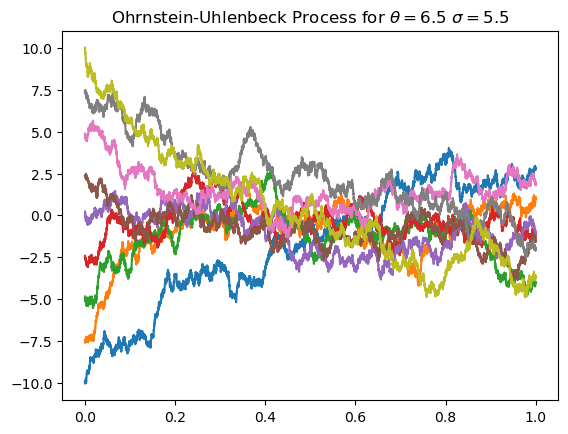

In [4]:
for i in initialConditions:
    plotList.append(plt.plot(sdeSimulation(1e4, i, 5.5, 3.5)[1], sdeSimulation(1e4, i, 5.5, 6.5)[0]))

plt.title(r"Ohrnstein-Uhlenbeck Process for $\theta = 6.5$ $\sigma = 5.5$")

Text(0.5, 1.0, 'Ohrnstein-Uhlenbeck Process for $\\theta = 6.5$ $\\sigma = 10.5$')

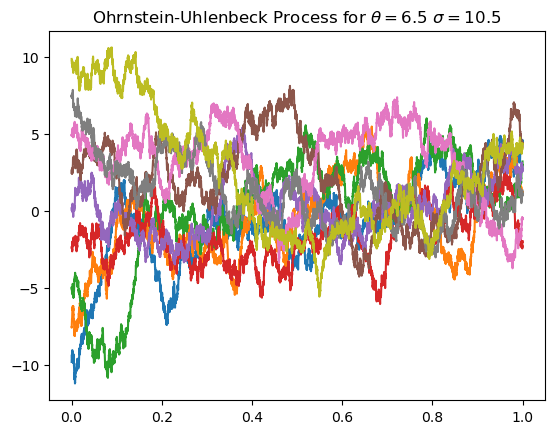

In [5]:
for i in initialConditions:
    plotList.append(plt.plot(sdeSimulation(1e4, i, 10.5, 3.5)[1], sdeSimulation(1e4, i, 10.5, 6.5)[0]))

plt.title(r"Ohrnstein-Uhlenbeck Process for $\theta = 6.5$ $\sigma = 10.5$")

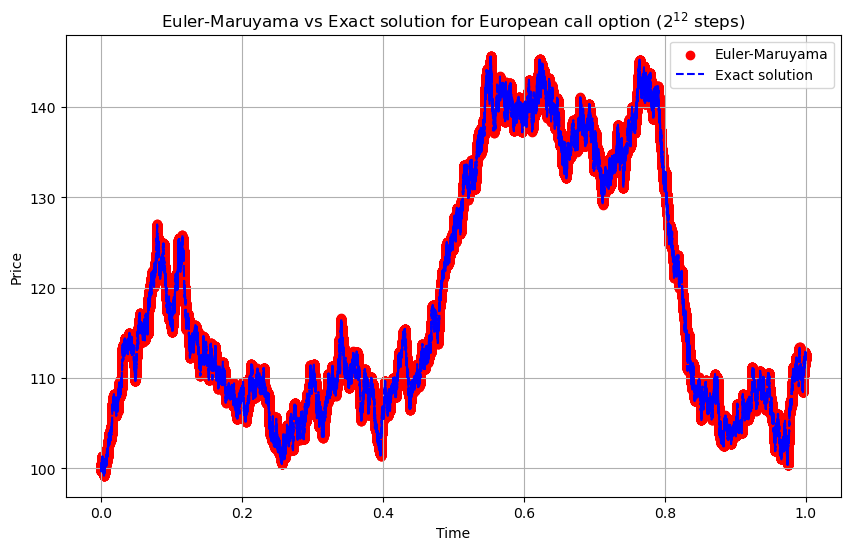

In [6]:
initialConditions = [2**20, 100, 0.3, 0.05]
results = blackScholes(*initialConditions)

plt.figure(figsize=(10, 6))
plt.title("Euler-Maruyama vs Exact solution for European call option ($2^{12}$ steps)")
plt.scatter(results[1], results[2], color = 'red', label = "Euler-Maruyama")
plt.plot(results[1], results[0], color = "blue", label = "Exact solution", ls="--")
plt.xlabel("Time")
plt.grid(True)
plt.ylabel("Price")
plt.legend()

In [7]:
mse = sum(results[-1])/len(results[-1])
print(f"MSE: {mse:.15f}")

MSE: 0.000000000001373


In [8]:
np.mean(results[0])

np.float64(118.63770530386954)

In [17]:
from scipy.stats import norm
def blackScholesCall(S, K, sigma, r, t):
    d1 = (np.log(S/K) + (r + sigma**2/2)*t)/(sigma * t**0.5)
    d2 = d1 - (sigma*t**0.5)
    call = S*norm.cdf(d1) - K*np.exp(-r*t)*norm.cdf(d2)

    return call

In [10]:
blackScholesCall(100, 100, 0.3, 0.05, 1)

np.float64(14.231254785985819)

In [13]:
def blackScholesMonteCarlo(nSims, steps, S0, K, sigma, r, T):
    payoffs = []
    h = T / steps
    
    for _ in range(nSims):
        S = S0
        for _ in range(steps): # "simplified" version of the blackScholes function
            dW = np.random.normal(0, np.sqrt(h))
            S = S + r * S * h + sigma * S * dW + 0.5 * sigma**2 * S * (dW**2 - h)
        
        payoff = max(S - K, 0)
        payoffs.append(payoff)
    
    discountFactor = np.exp(-r * T)
    optionPrice = discountFactor * np.mean(payoffs)
    return optionPrice

In [21]:
K = 100
r = 0.05
T = 1.0
sigma = 0.3
S0 = 100
n = 2**12
steps = 2**12

params = [n, steps, S0, K, sigma, r, T]

price = blackScholesMonteCarlo(*params)
print(price)  # Deverá dar ~14.23 (como a fórmula analítica)

14.500088010533673


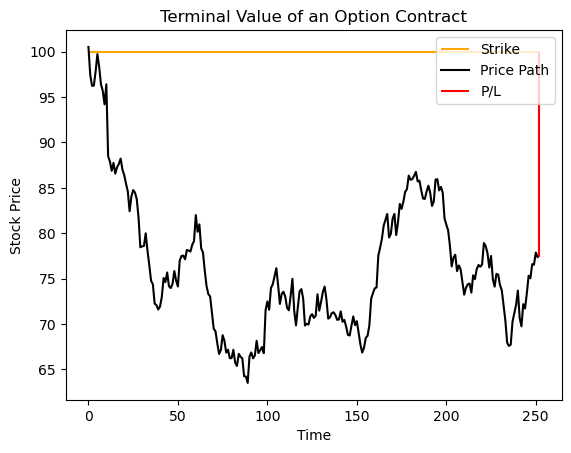

Premium at t=0: 14.23
P/L: -14.23


In [28]:
import matplotlib.pyplot as plt
import qfin as qf

# simulate dynamics of the underlying according to Geometric Brownian Motion
path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)


# create a chart of the price path and the strike price
plt.title("Terminal Value of an Option Contract")
plt.hlines(100, 0, 252, label='Strike', color='orange')
plt.plot(path.simulated_path, label='Price Path', color='black')
if max(path.simulated_path[-1] - 100, 0) == 0:
    plt.vlines(252, path.simulated_path[-1], 100, color='red', label="P/L")
else:
    plt.vlines(252, 100, path.simulated_path[-1], color='green', label="P/L")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# print the premium and the resulting P/L
print(f"Premium at t=0: {blackScholesCall(100, 100, .3, .05, 1):.2f}")
print(f"P/L: {max(path.simulated_path[-1] - 100, 0) - blackScholesCall(100, 100, .3, .05, 1):.2f}")

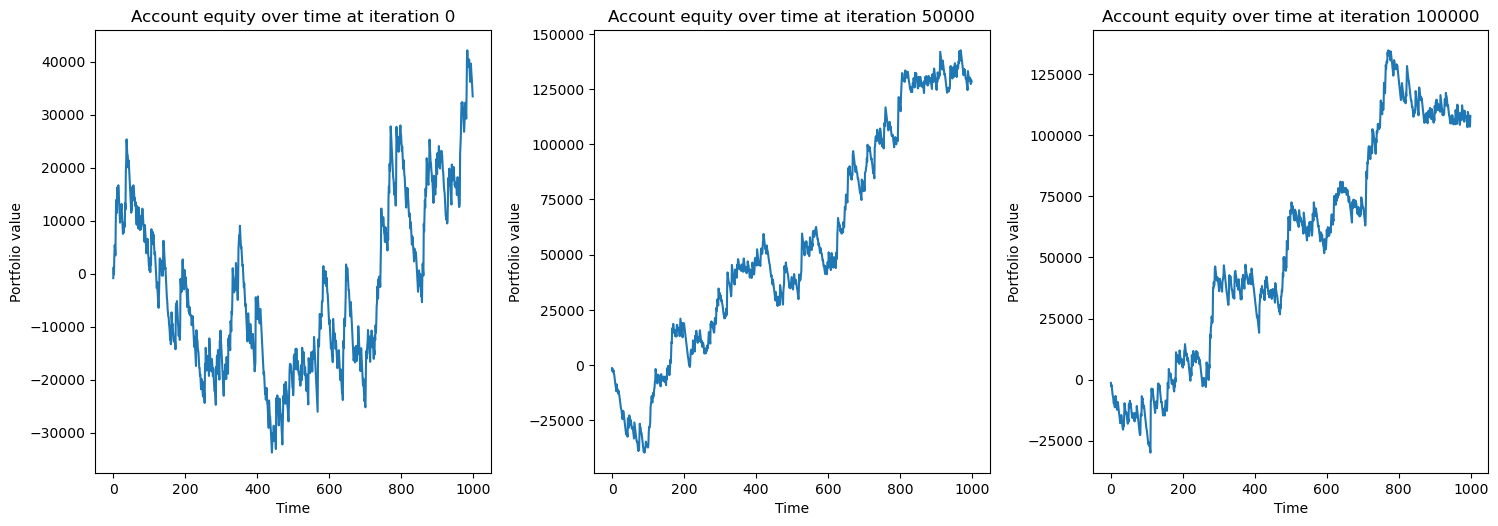

In [67]:
premium = 14.10 * 100
steps = [i for i in range(0, 100000 + 50000) if i % 50000 == 0]

plt.figure(figsize=(50, 50))  # Tamanho dinâmico

for idx, r in enumerate(steps, 1):
    pls = []
    for i in range(1000): 
        path = qf.simulations.GeometricBrownianMotion(100, .05, .3, 1/252, 1)
        pls.append(max(path.simulated_path[-1] - 100, 0)*100 - premium)
    
    plt.subplot(10, 10, idx)  # Organiza em linhas x colunas
    plt.plot(np.cumsum(pls))
    plt.xlabel("Time")
    plt.ylabel("Portfolio value")
    plt.title(f"Account equity over time at iteration {r}")

plt.tight_layout()  # Evita sobreposição
plt.show()
